**Performance Evaluation of Clustering Algorithms for Varying Size of Datasets Using Scikit-learn**

**Small-sized datasets #1 (Iris Dataset)**

K-Means algorithm for Iris dataset


In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
from collections import Counter
import pandas as pd
import time
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # Feature matrix

# Define the number of clusters (k)
k = 3

# Create a KMeans instance
kmeans = KMeans(n_clusters=k, random_state=42, n_init = 'auto')

# Measure CPU time for fitting the model
start_time = time.time()
kmeans.fit(X)
end_time = time.time()
cpu_time = end_time - start_time

# Get cluster assignments for each data point
cluster_labels = kmeans.labels_

# Calculate silhouette score
silhouette_avg = silhouette_score(X, cluster_labels)

# Calculate Davies-Bouldin index (lower is better)
davies_bouldin = davies_bouldin_score(X, cluster_labels)

# Calculate Calinski-Harabasz index (higher is better)
calinski_harabasz = calinski_harabasz_score(X, cluster_labels)

cluster_centers = kmeans.cluster_centers_
# Get the true species labels from the Iris dataset
true_labels = iris.target

# Create a DataFrame to store the results
results_df = pd.DataFrame({'True Species': true_labels, 'Cluster Label': cluster_labels})

# Create a mapping from cluster labels to species labels
cluster_to_species_mapping = {
    0: 1,  # Cluster 1 corresponds to Iris species 1 (Setosa)
    1: 0,  # Cluster 2 corresponds to Iris species 0 (Versicolor)
    2: 2   # Cluster 3 corresponds to Iris species 2 (Virginica)
}

# Remap the cluster labels to species labels
results_df['Mapped Species'] = results_df['Cluster Label'].map(cluster_to_species_mapping)

# Calculate the number of correct and incorrect classifications
results_df['Correct Classification'] = results_df['True Species'] == results_df['Mapped Species']
correct_counts = results_df.groupby('True Species')['Correct Classification'].sum()
incorrect_counts = results_df.groupby('True Species')['Correct Classification'].count() - correct_counts

# Create a table to display the counts
classification_table = pd.DataFrame({'Correct Classifications': correct_counts, 'Incorrect Classifications': incorrect_counts})
classification_table.index.name = 'Iris Species'

# Display the table
print(classification_table)
print('------------')

# Print the evaluation metrics and CPU time
print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {davies_bouldin}")
print(f"Calinski-Harabasz Index: {calinski_harabasz}")
print(f"CPU Time: {cpu_time*1000} milliseconds")

              Correct Classifications  Incorrect Classifications
Iris Species                                                    
0                                  50                          0
1                                   3                         47
2                                  14                         36
------------
Silhouette Score: 0.551191604619592
Davies-Bouldin Index: 0.6660385791628493
Calinski-Harabasz Index: 561.5937320156642
CPU Time: 4.277944564819336 milliseconds


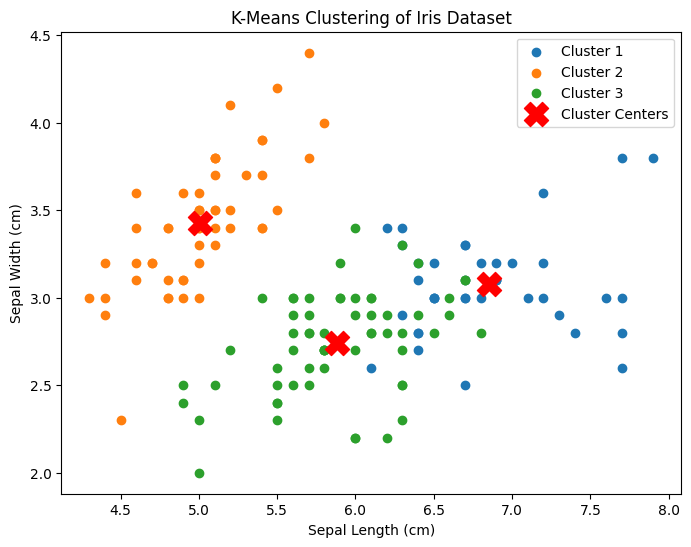

In [ ]:
import matplotlib.pyplot as plt

# Visualize the clusters
plt.figure(figsize=(8, 6))

for i in range(k):
    # Plot points that belong to cluster i
    plt.scatter(X[cluster_labels == i, 0], X[cluster_labels == i, 1], label=f'Cluster {i + 1}')

# Plot cluster centers
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=300, c='red', marker='X', label='Cluster Centers')
plt.title('K-Means Clustering of Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()

DBSCAN algorithm for Iris dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import time

iris = datasets.load_iris()
X = iris.data
y = iris.target

dbscan = DBSCAN(eps=0.5, min_samples=5)
start_time = time.time()
dbscan_labels = dbscan.fit_predict(X)
end_time = time.time()

cpu_time_ms = (end_time - start_time) * 1000

silhouette_avg = silhouette_score(X, dbscan_labels)
davies_bouldin = davies_bouldin_score(X, dbscan_labels)
calinski_harabasz = calinski_harabasz_score(X, dbscan_labels)

print("DBSCAN Clustering Results:")
print(f"Silhouette Score: {silhouette_avg:.2f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.2f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz:.2f}")
print(f"CPU Time: {cpu_time_ms:.2f} milliseconds")


DBSCAN Clustering Results:
Silhouette Score: 0.49
Davies-Bouldin Index: 7.22
Calinski-Harabasz Index: 220.30
CPU Time: 2.69 milliseconds


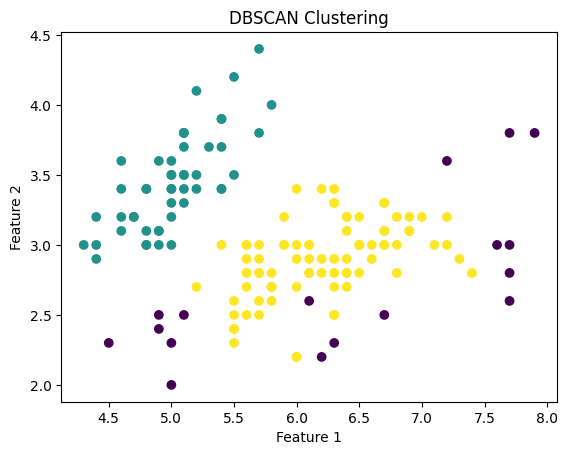

In [ ]:
# Scatter plot the data points with their DBSCAN labels
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis')
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


Spectral clustering algorithm for Iris dataset


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import time

iris = datasets.load_iris()
X = iris.data
y = iris.target

spectral = SpectralClustering(n_clusters=3, affinity='rbf', random_state=42)
start_time = time.time()
spectral_labels = spectral.fit_predict(X)
end_time = time.time()

silhouette_avg = silhouette_score(X, spectral_labels)
davies_bouldin = davies_bouldin_score(X, spectral_labels)
calinski_harabasz = calinski_harabasz_score(X, spectral_labels)

print("Spectral Clustering Results:")
print(f"Silhouette Score: {silhouette_avg:.2f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.2f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz:.2f}")
print(f"CPU Time: {(end_time - start_time)*1000:.2f} milliseconds")


Spectral Clustering Results:
Silhouette Score: 0.56
Davies-Bouldin Index: 0.65
Calinski-Harabasz Index: 556.12
CPU Time: 108.21 milliseconds


Small-sized datasets #2 (Wine Dataset)

K-means algorithm for Wine dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import time

wine = datasets.load_wine()
X = wine.data

kmeans = KMeans(n_clusters=3, random_state=42, n_init = 'auto')
start_time = time.time()
kmeans_labels = kmeans.fit_predict(X)
end_time = time.time()

silhouette_avg = silhouette_score(X, kmeans_labels)
davies_bouldin = davies_bouldin_score(X, kmeans_labels)
calinski_harabasz = calinski_harabasz_score(X, kmeans_labels)

print("K-means Clustering Results:")
print(f"Silhouette Score: {silhouette_avg:.2f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.2f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz:.2f}")
print(f"CPU Time: {(end_time - start_time)*1000:.2f} milliseconds")


K-means Clustering Results:
Silhouette Score: 0.57
Davies-Bouldin Index: 0.53
Calinski-Harabasz Index: 561.82
CPU Time: 6.94 milliseconds


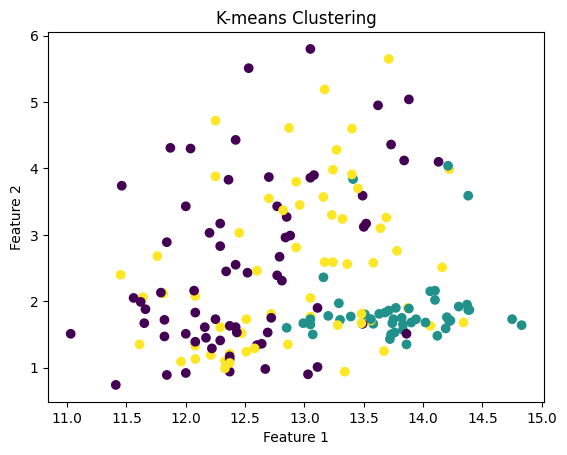

In [ ]:
# Scatter plot the data points with their K-means labels
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("K-means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


DBSCAN algorithm for Wine dataset

Silhouette Score: 0.27
Davies-Bouldin Index: 2.28
Calinski-Harabasz Index: 1.98
CPU Time: 3.27 milliseconds


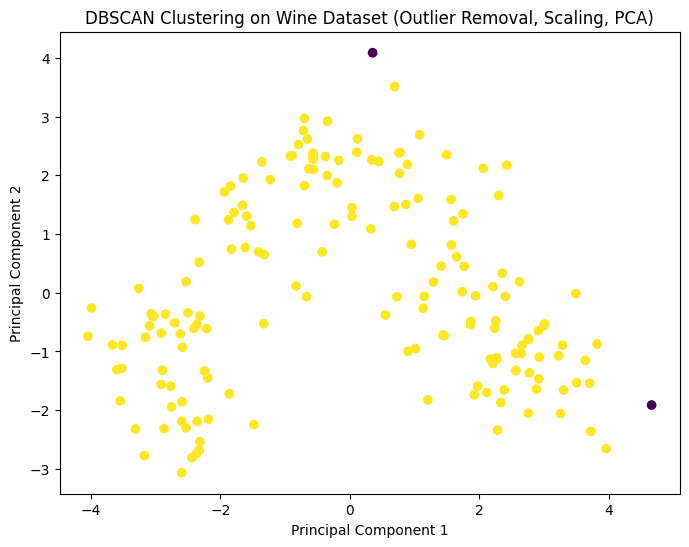

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import time
from sklearn.ensemble import IsolationForest

# Load the Wine dataset
wine = datasets.load_wine()
X = wine.data

# Detect and remove outliers using Isolation Forest
outlier_detector = IsolationForest(contamination=0.05, random_state=42)
outlier_mask = outlier_detector.fit_predict(X) != -1
X_cleaned = X[outlier_mask]

# Preprocess the data (standardize features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cleaned)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply DBSCAN clustering
start_time = time.time()
dbscan = DBSCAN(eps=1.0, min_samples=5)
labels = dbscan.fit_predict(X_pca)
end_time = time.time()
cpu_time = end_time - start_time

# Evaluate clustering using metrics
silhouette_avg = silhouette_score(X_pca, labels)
davies_bouldin_avg = davies_bouldin_score(X_pca, labels)
calinski_harabasz_avg = calinski_harabasz_score(X_pca, labels)

print(f"Silhouette Score: {silhouette_avg:.2f}")
print(f"Davies-Bouldin Index: {davies_bouldin_avg:.2f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_avg:.2f}")
print(f"CPU Time: {cpu_time*1000:.2f} milliseconds")

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.title("DBSCAN Clustering on Wine Dataset (Outlier Removal, Scaling, PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


Spectral clustering algorithm for Wine dataset

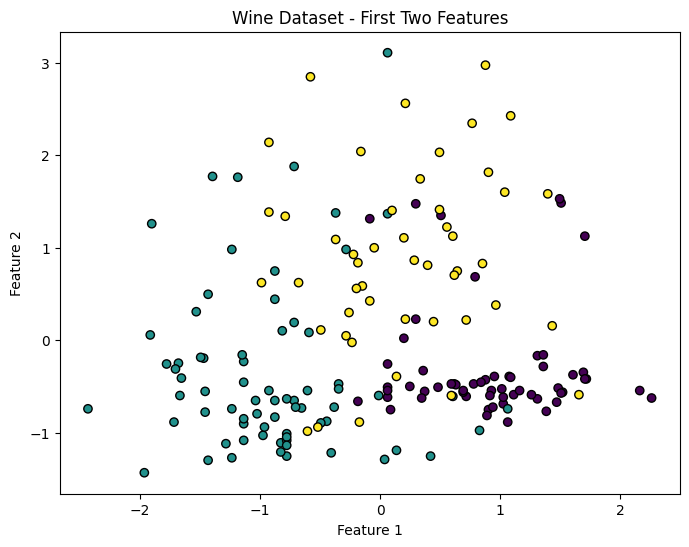

Silhouette Score: 0.24855292006311666
Davies-Bouldin Index: 1.2712824811975638
Calinski-Harabasz Index: 36.86644390660434
CPU Time: 42.81926155090332 milliseconds


In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import time

# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Standardize the data (important for spectral clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Plot the first two features to visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title('Wine Dataset - First Two Features')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Apply Spectral Clustering
n_clusters = len(np.unique(y))  # Assuming the true number of clusters is the same as the number of classes
spectral_clustering = SpectralClustering(n_clusters=n_clusters, affinity='rbf', random_state=42)

start_time = time.time()
cluster_labels = spectral_clustering.fit_predict(X_scaled)
end_time = time.time()

# Evaluate the performance using clustering metrics
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
davies_bouldin = davies_bouldin_score(X_scaled, cluster_labels)
calinski_harabasz = calinski_harabasz_score(X_scaled, cluster_labels)
cpu_time = end_time - start_time

print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {davies_bouldin}")
print(f"Calinski-Harabasz Index: {calinski_harabasz}")
print(f"CPU Time: {cpu_time*1000} milliseconds")


**Small-sized datasets #3 (Breast Cancer Wisconsin (Diagnostic) dataset)**

K-means algorithm for Breast Cancer Wisconsin (Diagnostic) dataset

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.51
Davies-Bouldin Index: 0.81
Calinski-Harabasz Index: 623.55
CPU Time: 185.19 milliseconds


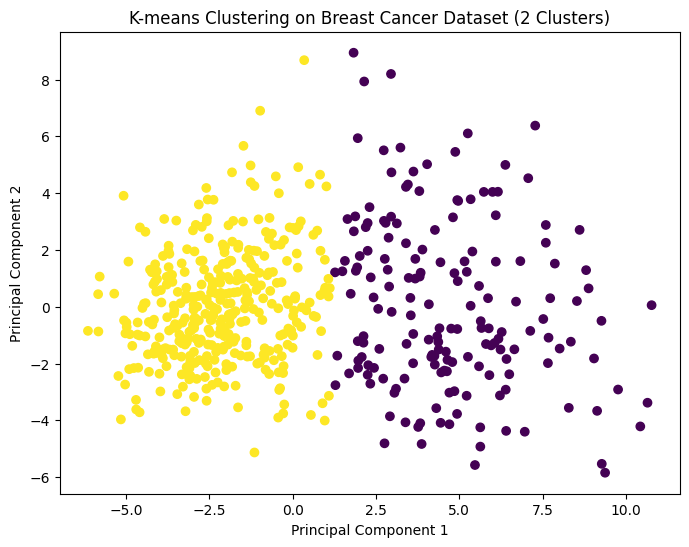

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import time

# Load the Breast Cancer Wisconsin (Diagnostic) dataset
cancer = datasets.load_breast_cancer()
X = cancer.data

# Detect and remove outliers using Isolation Forest
outlier_detector = IsolationForest(contamination=0.05, random_state=42)
outlier_mask = outlier_detector.fit_predict(X) != -1
X_cleaned = X[outlier_mask]

# Preprocess the cleaned data (standardize features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cleaned)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply K-means clustering
start_time = time.time()
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X_pca)
end_time = time.time()
cpu_time = end_time - start_time

# Evaluate clustering using metrics
silhouette_avg = silhouette_score(X_pca, labels)
davies_bouldin_avg = davies_bouldin_score(X_pca, labels)
calinski_harabasz_avg = calinski_harabasz_score(X_pca, labels)

print(f"Silhouette Score: {silhouette_avg:.2f}")
print(f"Davies-Bouldin Index: {davies_bouldin_avg:.2f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_avg:.2f}")
print(f"CPU Time: {cpu_time*1000:.2f} milliseconds")

# Plot the data with cluster assignments
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.title("K-means Clustering on Breast Cancer Dataset (2 Clusters)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


DBSCAN algorithm for Breast Cancer Wisconsin (Diagnostic) dataset

Silhouette Score: -0.09
Davies-Bouldin Index: 1.62
Calinski-Harabasz Index: 47.41
CPU Time: 10.95 milliseconds


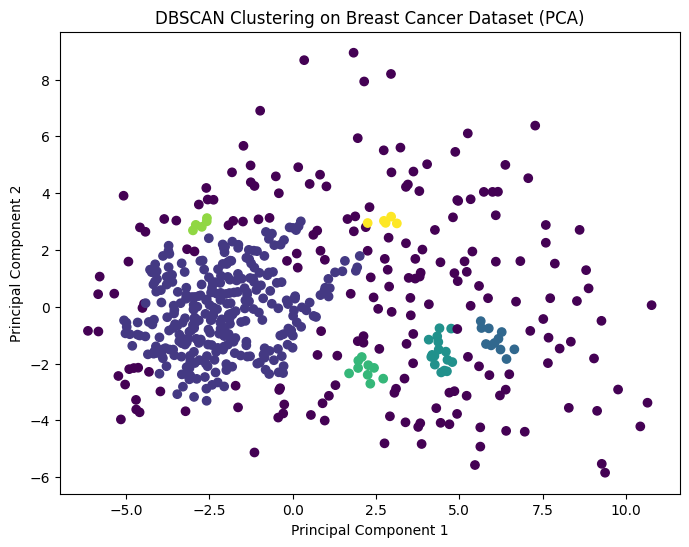

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import time

# Load the Breast Cancer Wisconsin (Diagnostic) dataset
cancer = datasets.load_breast_cancer()
X = cancer.data

# Detect and remove outliers using Isolation Forest
outlier_detector = IsolationForest(contamination=0.05, random_state=42)
outlier_mask = outlier_detector.fit_predict(X) != -1
X_cleaned = X[outlier_mask]

# Preprocess the cleaned data (standardize features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cleaned)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply DBSCAN clustering
start_time = time.time()
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_pca)
end_time = time.time()
cpu_time = end_time - start_time

# Evaluate clustering using metrics
silhouette_avg = silhouette_score(X_pca, labels)
davies_bouldin_avg = davies_bouldin_score(X_pca, labels)
calinski_harabasz_avg = calinski_harabasz_score(X_pca, labels)

print(f"Silhouette Score: {silhouette_avg:.2f}")
print(f"Davies-Bouldin Index: {davies_bouldin_avg:.2f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_avg:.2f}")
print(f"CPU Time: {cpu_time*1000:.2f} milliseconds")

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.title("DBSCAN Clustering on Breast Cancer Dataset (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


Spectral clustering algorithm for Breast Cancer Wisconsin (Diagnostic) dataset

Silhouette Score: 0.51
Davies-Bouldin Index: 0.82
Calinski-Harabasz Index: 563.28
CPU Time: 0.30 seconds


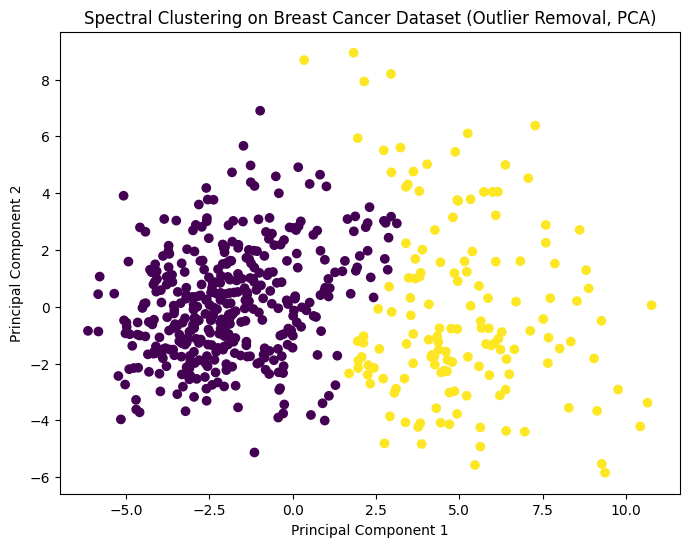

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.ensemble import IsolationForest
import time

# Load the Breast Cancer Wisconsin (Diagnostic) dataset
cancer = datasets.load_breast_cancer()
X = cancer.data

# Detect and remove outliers using Isolation Forest
outlier_detector = IsolationForest(contamination=0.05, random_state=42)
outlier_mask = outlier_detector.fit_predict(X) != -1
X_cleaned = X[outlier_mask]

# Preprocess the cleaned data (standardize features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cleaned)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply Spectral Clustering
start_time = time.time()
spectral_clustering = SpectralClustering(n_clusters=2, affinity='rbf', random_state=42)
labels = spectral_clustering.fit_predict(X_pca)
end_time = time.time()
cpu_time = end_time - start_time

# Evaluate clustering using metrics
silhouette_avg = silhouette_score(X_pca, labels)
davies_bouldin_avg = davies_bouldin_score(X_pca, labels)
calinski_harabasz_avg = calinski_harabasz_score(X_pca, labels)

print(f"Silhouette Score: {silhouette_avg:.2f}")
print(f"Davies-Bouldin Index: {davies_bouldin_avg:.2f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_avg:.2f}")
print(f"CPU Time: {cpu_time:.2f} seconds")

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.title("Spectral Clustering on Breast Cancer Dataset (Outlier Removal, PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


Medium-Sized datasets #1 (Mall Customer Segmentation Dataset)

K-means algorithm for Mall Customer Segmentation Dataset

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.47
Davies-Bouldin Index: 0.72
Calinski-Harabasz Index: 151.34
CPU Time: 293.58 milliseconds


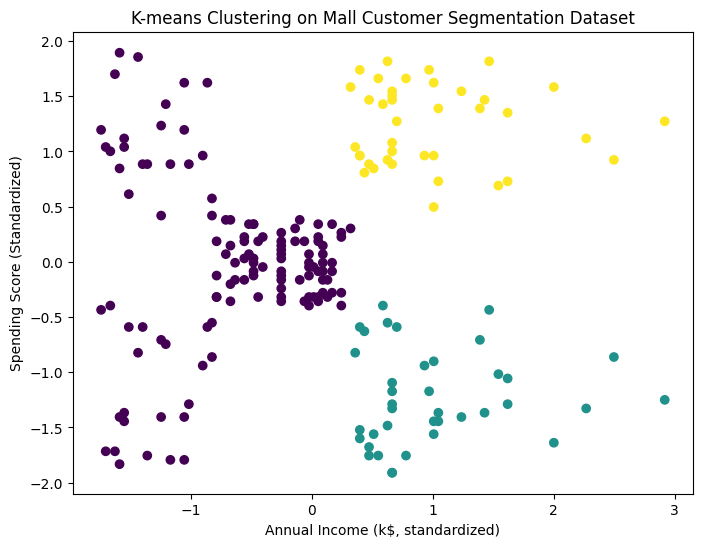

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import time

# Load the Mall Customer Segmentation Dataset
data = pd.read_csv('Mall_Customers.csv')

X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Preprocess the data (standardize features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering
start_time = time.time()
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)
end_time = time.time()
cpu_time = end_time - start_time

# Evaluate clustering using metrics
silhouette_avg = silhouette_score(X_scaled, labels)
davies_bouldin_avg = davies_bouldin_score(X_scaled, labels)
calinski_harabasz_avg = calinski_harabasz_score(X_scaled, labels)

print(f"Silhouette Score: {silhouette_avg:.2f}")
print(f"Davies-Bouldin Index: {davies_bouldin_avg:.2f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_avg:.2f}")
print(f"CPU Time: {cpu_time*1000:.2f} milliseconds")

# Plot the data with cluster assignments
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.title("K-means Clustering on Mall Customer Segmentation Dataset")
plt.xlabel("Annual Income (k$, standardized)")
plt.ylabel("Spending Score (Standardized)")
plt.show()


DBSCAN algorithm for Mall Customers Segmentation dataset

Silhouette Score: 0.32
Davies-Bouldin Index: 2.03
Calinski-Harabasz Index: 32.66
CPU Time: 3.69 milliseconds


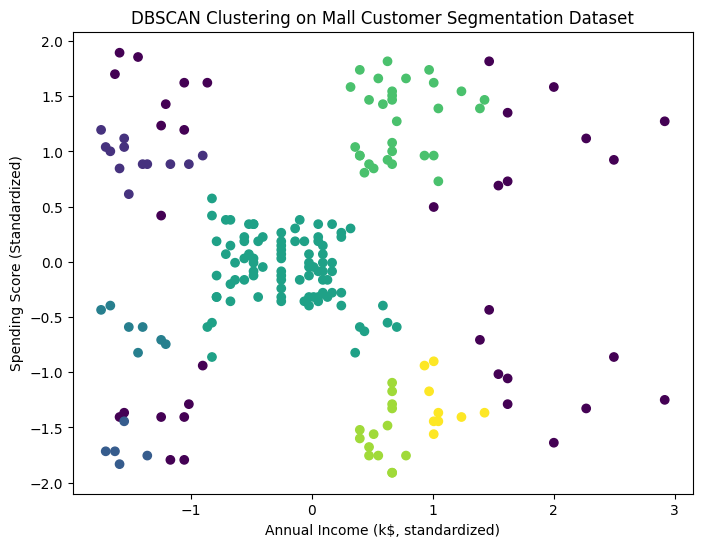

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import time

# Load the Mall Customer Segmentation Dataset
data = pd.read_csv('Mall_Customers.csv')

X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Preprocess the data (standardize features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN clustering
start_time = time.time()
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X_scaled)
end_time = time.time()
cpu_time = end_time - start_time

# Evaluate clustering using metrics
silhouette_avg = silhouette_score(X_scaled, labels)
davies_bouldin_avg = davies_bouldin_score(X_scaled, labels)
calinski_harabasz_avg = calinski_harabasz_score(X_scaled, labels)

print(f"Silhouette Score: {silhouette_avg:.2f}")
print(f"Davies-Bouldin Index: {davies_bouldin_avg:.2f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_avg:.2f}")
print(f"CPU Time: {cpu_time*1000:.2f} milliseconds")

# Plot the data with cluster assignments
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.title("DBSCAN Clustering on Mall Customer Segmentation Dataset")
plt.xlabel("Annual Income (k$, standardized)")
plt.ylabel("Spending Score (Standardized)")
plt.show()


Spectral clustering algorithm for Mall Customers Segmentation dataset

Silhouette Score: 0.46
Davies-Bouldin Index: 0.71
Calinski-Harabasz Index: 141.98
CPU Time: 59.59 milliseconds


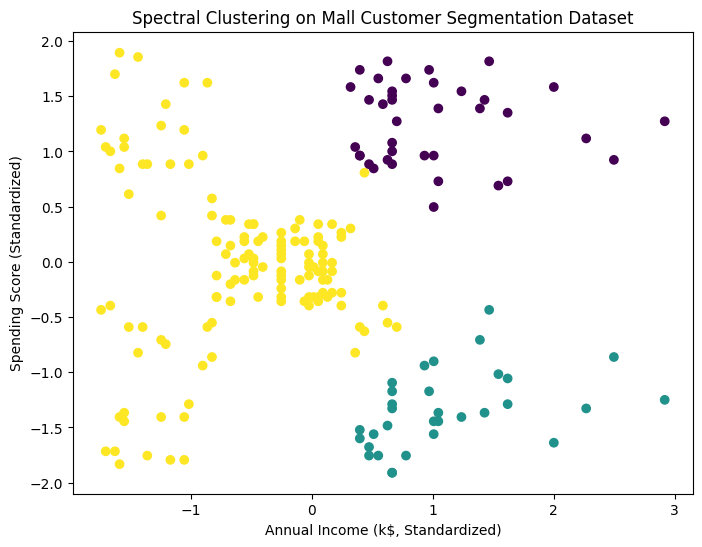

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import time

# Load the Mall Customer Segmentation Dataset
data = pd.read_csv('Mall_Customers.csv')

X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Preprocess the data (standardize features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Spectral Clustering
start_time = time.time()
spectral_clustering = SpectralClustering(n_clusters=3, affinity='rbf', random_state=42)
labels = spectral_clustering.fit_predict(X_scaled)
end_time = time.time()
cpu_time = end_time - start_time

# Evaluate clustering using metrics
silhouette_avg = silhouette_score(X_scaled, labels)
davies_bouldin_avg = davies_bouldin_score(X_scaled, labels)
calinski_harabasz_avg = calinski_harabasz_score(X_scaled, labels)

print(f"Silhouette Score: {silhouette_avg:.2f}")
print(f"Davies-Bouldin Index: {davies_bouldin_avg:.2f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_avg:.2f}")
print(f"CPU Time: {cpu_time*1000:.2f} milliseconds")

# Plot the data with cluster assignments
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.title("Spectral Clustering on Mall Customer Segmentation Dataset")
plt.xlabel("Annual Income (k$, Standardized)")
plt.ylabel("Spending Score (Standardized)")
plt.show()


Medium-sized datasets #2

K-means algorithm for Credit Card Customer Segmentation Dataset

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.49
Davies-Bouldin Index: 0.80
Calinski-Harabasz Index: 936.92
CPU Time: 719.90 milliseconds


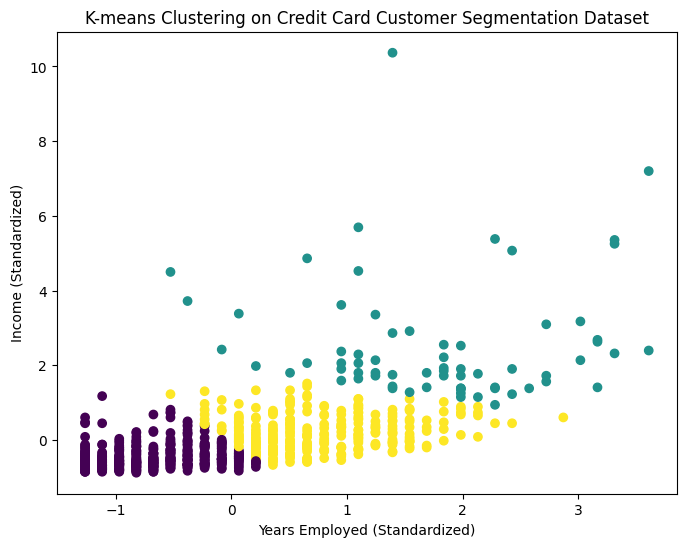

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import time

# Load the Credit Card Customer Segmentation Dataset
data = pd.read_csv('customer_segmentation.csv')

X = data[['Years Employed', 'Income']]

# Preprocess the data (standardize features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering
start_time = time.time()
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)
end_time = time.time()
cpu_time = end_time - start_time

# Evaluate clustering using metrics
silhouette_avg = silhouette_score(X_scaled, labels)
davies_bouldin_avg = davies_bouldin_score(X_scaled, labels)
calinski_harabasz_avg = calinski_harabasz_score(X_scaled, labels)

print(f"Silhouette Score: {silhouette_avg:.2f}")
print(f"Davies-Bouldin Index: {davies_bouldin_avg:.2f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_avg:.2f}")
print(f"CPU Time: {cpu_time*1000:.2f} milliseconds")

# Plot the data with cluster assignments
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.title("K-means Clustering on Credit Card Customer Segmentation Dataset")
plt.xlabel("Years Employed (Standardized)")
plt.ylabel("Income (Standardized)")
plt.show()


DBSCAN algorithm for Credit Card Customer Segmentation Dataset

Silhouette Score: 0.46
Davies-Bouldin Index: 1.99
Calinski-Harabasz Index: 228.69
CPU Time: 11.72 milliseconds


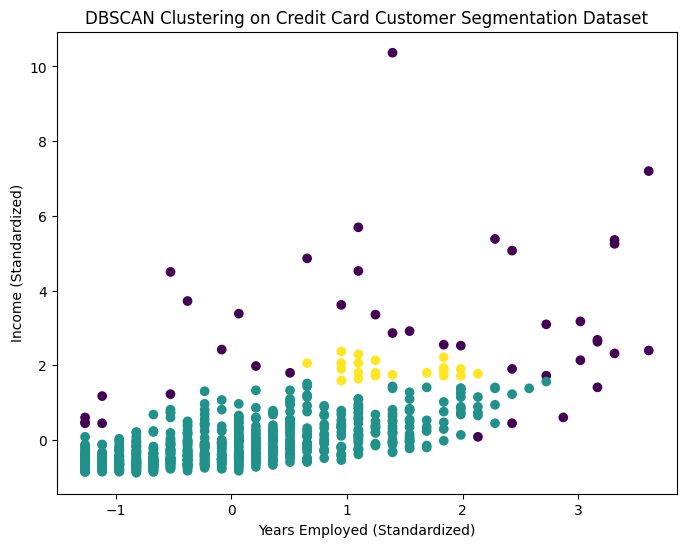

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import time

# Load the Credit Card Customer Segmentation Dataset
data = pd.read_csv('customer_segmentation.csv')

X = data[['Years Employed', 'Income']]

# Preprocess the data (standardize features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN clustering
start_time = time.time()
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X_scaled)
end_time = time.time()
cpu_time = end_time - start_time

# Evaluate clustering using metrics
silhouette_avg = silhouette_score(X_scaled, labels)
davies_bouldin_avg = davies_bouldin_score(X_scaled, labels)
calinski_harabasz_avg = calinski_harabasz_score(X_scaled, labels)

print(f"Silhouette Score: {silhouette_avg:.2f}")
print(f"Davies-Bouldin Index: {davies_bouldin_avg:.2f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_avg:.2f}")
print(f"CPU Time: {cpu_time*1000:.2f} milliseconds")

# Plot the data with cluster assignments
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.title("DBSCAN Clustering on Credit Card Customer Segmentation Dataset")
plt.xlabel("Years Employed (Standardized)")
plt.ylabel("Income (Standardized)")
plt.show()


Spectral clustering algorithm for Credit Card Customer Segmentation Dataset

Silhouette Score: 0.70
Davies-Bouldin Index: 0.75
Calinski-Harabasz Index: 128.09
CPU Time: 272.34 milliseconds


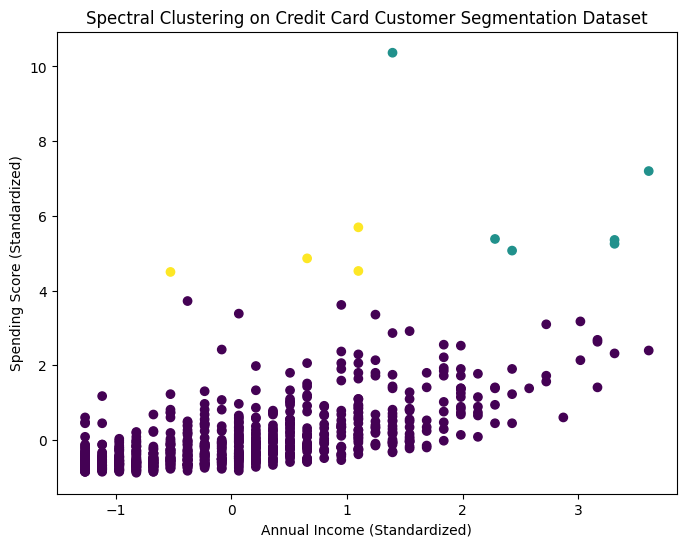

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import time

# Load the Credit Card Customer Segmentation Dataset
data = pd.read_csv('customer_segmentation.csv')

X = data[['Years Employed', 'Income']]

# Preprocess the data (standardize features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Spectral Clustering
start_time = time.time()
spectral_clustering = SpectralClustering(n_clusters=3, affinity='rbf', random_state=42)
labels = spectral_clustering.fit_predict(X_scaled)
end_time = time.time()
cpu_time = end_time - start_time

# Evaluate clustering using metrics
silhouette_avg = silhouette_score(X_scaled, labels)
davies_bouldin_avg = davies_bouldin_score(X_scaled, labels)
calinski_harabasz_avg = calinski_harabasz_score(X_scaled, labels)

print(f"Silhouette Score: {silhouette_avg:.2f}")
print(f"Davies-Bouldin Index: {davies_bouldin_avg:.2f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_avg:.2f}")
print(f"CPU Time: {cpu_time*1000:.2f} milliseconds")

# Plot the data with cluster assignments
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.title("Spectral Clustering on Credit Card Customer Segmentation Dataset")
plt.xlabel("Annual Income (Standardized)")
plt.ylabel("Spending Score (Standardized)")
plt.show()


Medium-sized datasets #3 (Wholesale Customer Segmentation Dataset)

K-means algorithm for Wholesale Customer Segmentation Dataset

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.55
Davies-Bouldin Index: 0.75
Calinski-Harabasz Index: 282.16
CPU Time: 1.05 seconds


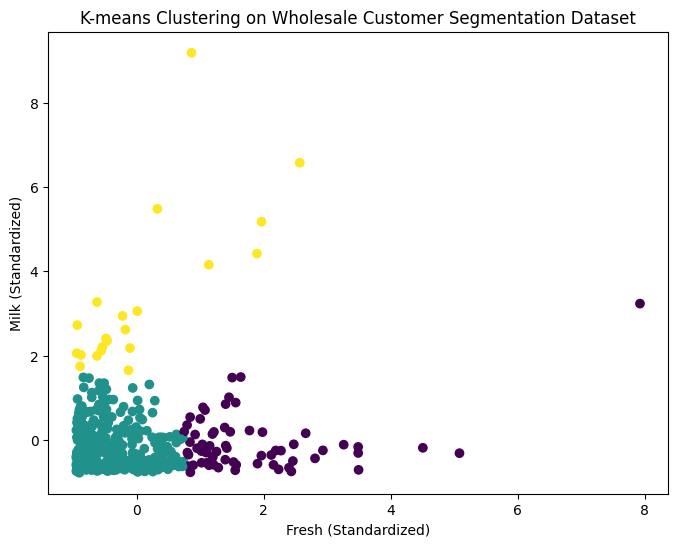

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import time

# Load the Wholesale Customer Segmentation Dataset
data = pd.read_csv('Wholesale customers data.csv')

X = data[['Fresh', 'Milk']]

# Preprocess the data (standardize features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering
start_time = time.time()
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)
end_time = time.time()
cpu_time = end_time - start_time

# Evaluate clustering using metrics
silhouette_avg = silhouette_score(X_scaled, labels)
davies_bouldin_avg = davies_bouldin_score(X_scaled, labels)
calinski_harabasz_avg = calinski_harabasz_score(X_scaled, labels)

print(f"Silhouette Score: {silhouette_avg:.2f}")
print(f"Davies-Bouldin Index: {davies_bouldin_avg:.2f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_avg:.2f}")
print(f"CPU Time: {cpu_time:.2f} seconds")

# Plot the data with cluster assignments
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.title("K-means Clustering on Wholesale Customer Segmentation Dataset")
plt.xlabel("Fresh (Standardized)")
plt.ylabel("Milk (Standardized)")
plt.show()


DBSCAN algorithm for Wholesale Customer Segmentation Dataset

Silhouette Score: 0.41
Davies-Bouldin Index: 1.18
Calinski-Harabasz Index: 88.06
CPU Time: 0.01 seconds


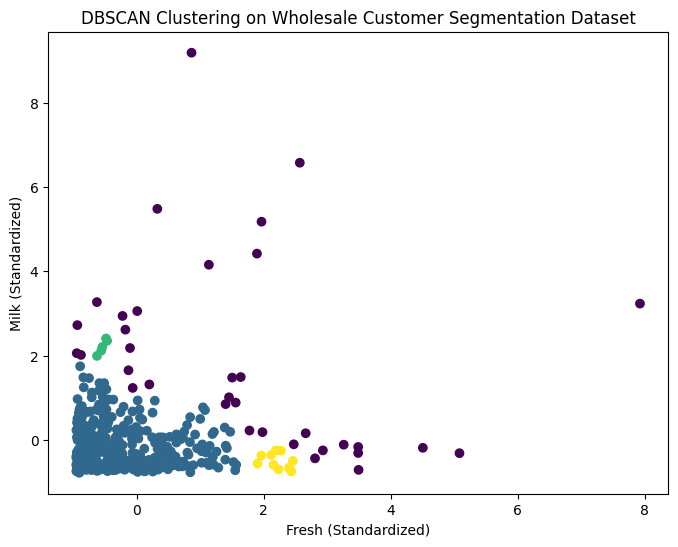

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import time

# Load the Wholesale Customer Segmentation Dataset
data = pd.read_csv('Wholesale customers data.csv')

X = data[['Fresh', 'Milk']]

# Preprocess the data (standardize features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN clustering
start_time = time.time()
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X_scaled)
end_time = time.time()
cpu_time = end_time - start_time

# Evaluate clustering using metrics
silhouette_avg = silhouette_score(X_scaled, labels)
davies_bouldin_avg = davies_bouldin_score(X_scaled, labels)
calinski_harabasz_avg = calinski_harabasz_score(X_scaled, labels)

print(f"Silhouette Score: {silhouette_avg:.2f}")
print(f"Davies-Bouldin Index: {davies_bouldin_avg:.2f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_avg:.2f}")
print(f"CPU Time: {cpu_time:.2f} seconds")

# Plot the data with cluster assignments
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.title("DBSCAN Clustering on Wholesale Customer Segmentation Dataset")
plt.xlabel("Fresh (Standardized)")
plt.ylabel("Milk (Standardized)")
plt.show()


Spectral clustering algorithm for Wholesale Customer Segmentation Dataset

Silhouette Score: 0.76
Davies-Bouldin Index: 0.55
Calinski-Harabasz Index: 128.89
CPU Time: 0.28 seconds


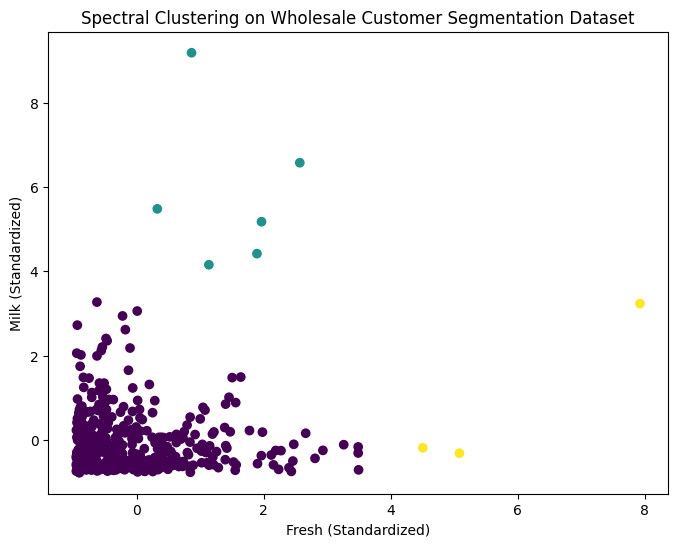

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import time

# Load the Wholesale Customer Segmentation Dataset
data = pd.read_csv('Wholesale customers data.csv')

X = data[['Fresh', 'Milk']]

# Preprocess the data (standardize features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Spectral Clustering
start_time = time.time()
spectral_clustering = SpectralClustering(n_clusters=3, affinity='rbf', random_state=42)
labels = spectral_clustering.fit_predict(X_scaled)
end_time = time.time()
cpu_time = end_time - start_time

# Evaluate clustering using metrics
silhouette_avg = silhouette_score(X_scaled, labels)
davies_bouldin_avg = davies_bouldin_score(X_scaled, labels)
calinski_harabasz_avg = calinski_harabasz_score(X_scaled, labels)

print(f"Silhouette Score: {silhouette_avg:.2f}")
print(f"Davies-Bouldin Index: {davies_bouldin_avg:.2f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_avg:.2f}")
print(f"CPU Time: {cpu_time:.2f} seconds")

# Plot the data with cluster assignments
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.title("Spectral Clustering on Wholesale Customer Segmentation Dataset")
plt.xlabel("Fresh (Standardized)")
plt.ylabel("Milk (Standardized)")
plt.show()


Big-sized dataset (Census Income Dataset (Adult))

K-means algorithm for Census Income Dataset (Adult)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.41
Davies-Bouldin Index: 0.83
Calinski-Harabasz Index: 26084.05
CPU Time: 2.10 seconds


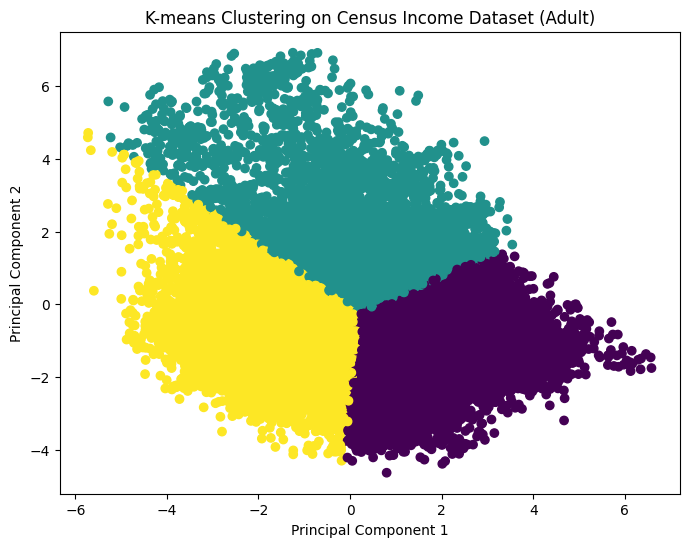

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import time

# Load the Census Income Dataset (Adult)
data = pd.read_csv('adult.csv')

# Preprocess the data: Encode categorical attributes
categorical_cols = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Select relevant features for clustering (exclude 'income' label)
X = data_encoded.drop(columns=['income'])

# Preprocess the data (standardize features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply K-means clustering
start_time = time.time()
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_pca)
end_time = time.time()
cpu_time = end_time - start_time

# Evaluate clustering using metrics
silhouette_avg = silhouette_score(X_pca, labels)
davies_bouldin_avg = davies_bouldin_score(X_pca, labels)
calinski_harabasz_avg = calinski_harabasz_score(X_pca, labels)

print(f"Silhouette Score: {silhouette_avg:.2f}")
print(f"Davies-Bouldin Index: {davies_bouldin_avg:.2f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_avg:.2f}")
print(f"CPU Time: {cpu_time:.2f} seconds")

# Create a scatter plot of the first two principal components with cluster assignments
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.title("K-means Clustering on Census Income Dataset (Adult)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


DBSCAN algorithm for Census Income Dataset (Adult)

Silhouette Score: 0.52
Davies-Bouldin Index: 1.72
Calinski-Harabasz Index: 23.23
CPU Time: 2.58 seconds


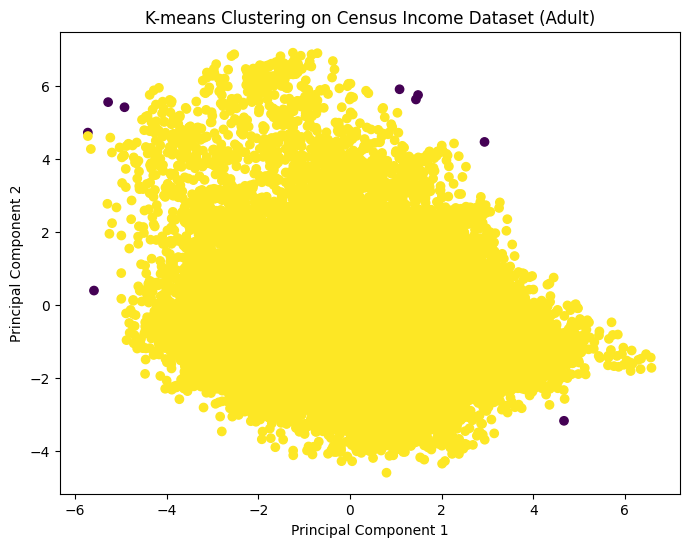

In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import time

# Load the Census Income Dataset (Adult)
data = pd.read_csv('adult.csv')

# Preprocess the data: Encode categorical attributes
categorical_cols = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']

X = data_encoded.drop(columns=['income'])

# Preprocess the data (standardize features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply DBSCAN clustering
start_time = time.time()
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_pca)
end_time = time.time()
cpu_time = end_time - start_time

# Evaluate clustering using metrics
silhouette_avg = silhouette_score(X_pca, labels)
davies_bouldin_avg = davies_bouldin_score(X_pca, labels)
calinski_harabasz_avg = calinski_harabasz_score(X_pca, labels)

print(f"Silhouette Score: {silhouette_avg:.2f}")
print(f"Davies-Bouldin Index: {davies_bouldin_avg:.2f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_avg:.2f}")
print(f"CPU Time: {cpu_time:.2f} seconds")

# Create a scatter plot of the first two principal components with cluster assignments
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.title("K-means Clustering on Census Income Dataset (Adult)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


Big-sized dataset #2 (Red Wine Quality dataset)

K-means algorithm for Red Wine Quality dataset

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.19
Davies-Bouldin Index: 1.77
Calinski-Harabasz Index: 313.33
CPU Time: 1.42 seconds


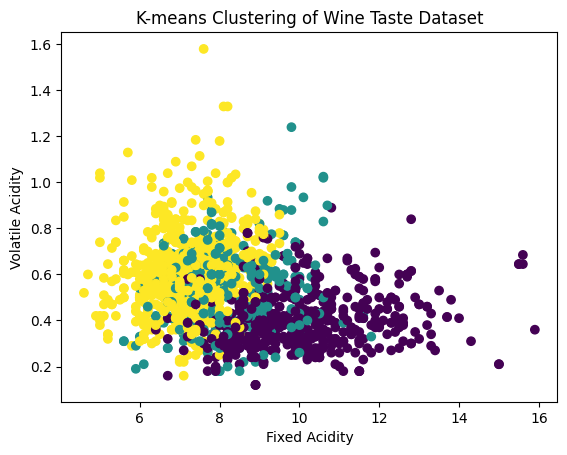

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import time

# Load the wine taste dataset
data = pd.read_csv('winequality-red.tsf', sep=';')

X = data.drop(columns=['quality'])

# Preprocess the data (standardize features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering
start_time = time.time()
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)
end_time = time.time()
cpu_time = end_time - start_time

# Evaluate clustering using metrics
silhouette_avg = silhouette_score(X_scaled, labels)
davies_bouldin_avg = davies_bouldin_score(X_scaled, labels)
calinski_harabasz_avg = calinski_harabasz_score(X_scaled, labels)

print(f"Silhouette Score: {silhouette_avg:.2f}")
print(f"Davies-Bouldin Index: {davies_bouldin_avg:.2f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_avg:.2f}")
print(f"CPU Time: {cpu_time:.2f} seconds")

# Plot the data for visualization
plt.scatter(X['fixed acidity'], X['volatile acidity'], c=labels, cmap='viridis')
plt.xlabel("Fixed Acidity")
plt.ylabel("Volatile Acidity")
plt.title("K-means Clustering of Wine Taste Dataset")
plt.show()


DBSCAN algorithm for Red Wine Quality dataset

Silhouette Score: 0.22
Davies-Bouldin Index: 1.96
Calinski-Harabasz Index: 34.47
CPU Time: 0.02 seconds


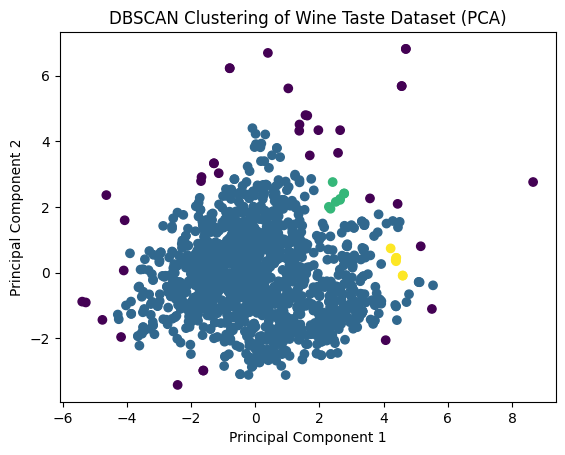

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import time

# Load the Wine Taste Dataset
data = pd.read_csv('winequality-red.tsf', sep=';')

# Select the features for clustering
X = data.drop(columns=['quality'])

# Preprocess the data (standardize features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply DBSCAN clustering
start_time = time.time()
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_pca)
end_time = time.time()
cpu_time = end_time - start_time

# Evaluate clustering using metrics
silhouette_avg = silhouette_score(X_pca, labels)
davies_bouldin_avg = davies_bouldin_score(X_pca, labels)
calinski_harabasz_avg = calinski_harabasz_score(X_pca, labels)

print(f"Silhouette Score: {silhouette_avg:.2f}")
print(f"Davies-Bouldin Index: {davies_bouldin_avg:.2f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_avg:.2f}")
print(f"CPU Time: {cpu_time:.2f} seconds")

# Plot the data for visualization (consider only two principal components)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("DBSCAN Clustering of Wine Taste Dataset (PCA)")
plt.show()


Big-sized dataset #3 (White Wine quality dataset)

K-means algorithm for White Wine Quality dataset

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.14
Davies-Bouldin Index: 2.10
Calinski-Harabasz Index: 928.23
CPU Time: 0.31 seconds


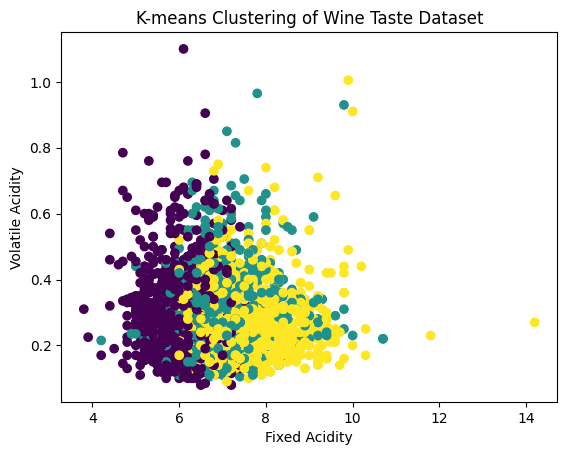

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import time

# Load the wine taste dataset
data = pd.read_csv('winequality-white.tsf', sep=';')

# Select the features for clustering (excluding 'quality')
X = data.drop(columns=['quality'])

# Preprocess the data (standardize features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering
start_time = time.time()
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)
end_time = time.time()
cpu_time = end_time - start_time

# Evaluate clustering using metrics
silhouette_avg = silhouette_score(X_scaled, labels)
davies_bouldin_avg = davies_bouldin_score(X_scaled, labels)
calinski_harabasz_avg = calinski_harabasz_score(X_scaled, labels)

print(f"Silhouette Score: {silhouette_avg:.2f}")
print(f"Davies-Bouldin Index: {davies_bouldin_avg:.2f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_avg:.2f}")
print(f"CPU Time: {cpu_time:.2f} seconds")

# Plot the data for visualization
plt.scatter(X['fixed acidity'], X['volatile acidity'], c=labels, cmap='viridis')
plt.xlabel("Fixed Acidity")
plt.ylabel("Volatile Acidity")
plt.title("K-means Clustering of Wine Taste Dataset")
plt.show()


DBSCAN algorithm for White Wine Quality dataset

Silhouette Score: 0.30
Davies-Bouldin Index: 5.76
Calinski-Harabasz Index: 13.56
CPU Time: 0.13 seconds


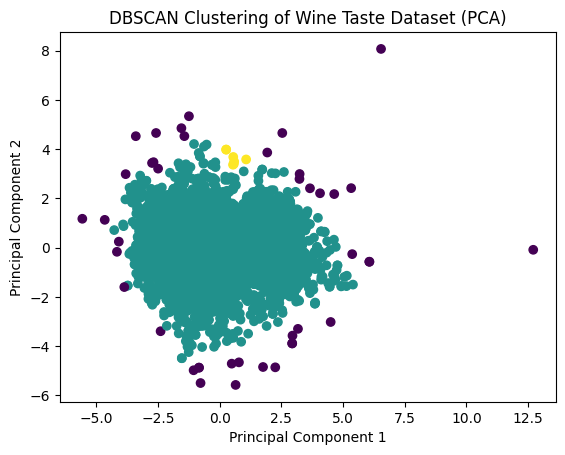

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import time

# Load the Wine Taste Dataset
data = pd.read_csv('winequality-white.tsf', sep=';')

# Select the features for clustering
X = data.drop(columns=['quality'])

# Preprocess the data (standardize features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply DBSCAN clustering
start_time = time.time()
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_pca)
end_time = time.time()
cpu_time = end_time - start_time

# Evaluate clustering using metrics
silhouette_avg = silhouette_score(X_pca, labels)
davies_bouldin_avg = davies_bouldin_score(X_pca, labels)
calinski_harabasz_avg = calinski_harabasz_score(X_pca, labels)

print(f"Silhouette Score: {silhouette_avg:.2f}")
print(f"Davies-Bouldin Index: {davies_bouldin_avg:.2f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_avg:.2f}")
print(f"CPU Time: {cpu_time:.2f} seconds")

# Plot the data for visualization (consider only two principal components)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("DBSCAN Clustering of Wine Taste Dataset (PCA)")
plt.show()
